In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
import dotenv
import arviz as az

if dotenv.find_dotenv() != "":
    os.chdir(dotenv.find_dotenv().replace('.env', ''))
else:
    os.chdir("..")

In [2]:
os.system("python notebooks/fit_error_propagation_model.py")

18:05:52 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status

[30.0, 40.0, 50.0]





chain 1 |▋         | 00:00 Iteration:    1 / 3000 [  0%]  (Warmup)
chain 2 |▋         | 00:00 Iteration:    1 / 3000 [  0%]  (Warmup)

chain 3 |▋         | 00:00 Iteration:    1 / 3000 [  0%]  (Warmup)


chain 4 |▉         | 00:00 Iteration:  100 / 3000 [  3%]  (Warmup)
chain 1 |▉         | 00:00 Iteration:  100 / 3000 [  3%]  (Warmup)

chain 3 |▉         | 00:00 Iteration:  100 / 3000 [  3%]  (Warmup)


chain 4 |█▎        | 00:00 Iteration:  200 / 3000 [  6%]  (Warmup)
chain 2 |█▎        | 00:00 Iteration:  200 / 3000 [  6%]  (Warmup)

chain 3 |█▎        | 00:00 Iteration:  200 / 3000 [  6%]  (Warmup)


chain 1 |█▌        | 00:00 Iteration:  300 / 3000 [ 10%]  (Warmup)
chain 2 |█▉        | 00:00 Iteration:  400 / 3000 [ 13%]  (Warmup)

chain 1 |█▉        | 00:00 Iteration:  400 / 3000 [ 13%]  (Warmup)


chain 4 |█▉        | 00:00 Iteration:  400 / 3000 [ 13%]  (Warmup)

chain 1 |██▌       | 00:00 Iteration:  600 / 3000 [ 20%]  (Warmup)


chain 4 |██▌       | 00:01 Iteration:  600 /

                                                                                                                                                                                                                                                                                                                                
     m_Glucose  m_Biomass  ...  c_Glucose  pseudobatch_mean
21       63.57     765.70  ...       0.08              1.01
76       57.95    4357.33  ...       0.08              6.96
156      59.24    8779.15  ...       0.08             18.61
292      77.64   17823.16  ...       0.08             49.28

[4 rows x 12 columns]


0

In [3]:
infd = az.from_json(os.path.join('notebooks', 'idata.json'))
#infd.assign_coords({
#    "time" : [10, 20, 30, 40]
#})
infd

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [4]:
display(az.summary(infd.sample_stats))
display("Number of diverging transitions: " + str(infd.sample_stats.diverging.values.sum()))

/Users/tedgro/Code/fedbatch-data-correction/.venv/lib/python3.10/site-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: divide by zero encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/tedgro/Code/fedbatch-data-correction/.venv/lib/python3.10/site-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lp,5.554,6.907,-8.239,17.736,0.379,0.268,338.0,639.0,1.01
acceptance_rate,0.991,0.047,0.975,1.000,0.003,0.003,18.0,104.0,1.15
step_size,0.020,0.012,0.011,0.040,0.006,0.004,4.0,4.0,inf
tree_depth,7.371,0.993,6.000,9.000,0.372,0.275,8.0,7.0,1.49
n_steps,243.578,171.618,63.000,511.000,48.422,35.068,8.0,9.0,1.46
diverging,0.000,0.000,0.000,0.000,0.000,0.000,4000.0,4000.0,NaN
energy,3.909,7.513,-10.102,18.526,0.418,0.296,328.0,557.0,1.01


'Number of diverging transitions: 0'

In [5]:
az.summary(infd, var_names=['pseudo_batch_c', 'c',  'v','sigma_v', 'sigma_f', 'sigma_c', 'sigma_s', 'sigma_cfeed', 'pump_bias', 's_frac_logit'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
pseudo_batch_c[10.0],1.006,0.356,0.688,1.265,0.014,0.010,1309.0,553.0,1.00
pseudo_batch_c[30.0],6.962,0.931,5.184,8.671,0.023,0.016,1982.0,632.0,1.00
pseudo_batch_c[40.0],18.614,2.862,12.970,23.118,0.087,0.061,1513.0,635.0,1.00
pseudo_batch_c[50.0],49.276,7.875,33.282,63.093,0.344,0.244,937.0,468.0,1.00
c[10.0],1.006,0.356,0.688,1.265,0.014,0.010,1309.0,553.0,1.00
c[30.0],5.607,0.743,4.162,6.931,0.018,0.013,2085.0,643.0,1.00
c[40.0],10.831,1.643,7.557,13.271,0.050,0.035,1573.0,642.0,1.00
c[50.0],16.389,2.535,10.669,20.146,0.112,0.079,1068.0,472.0,1.00
v[10.0],816.315,10.276,794.440,834.547,0.253,0.179,1928.0,1437.0,1.00
v[30.0],767.727,10.254,746.656,786.207,0.252,0.178,1913.0,1320.0,1.00


/Users/tedgro/Code/fedbatch-data-correction/.venv/lib/python3.10/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/tedgro/Code/fedbatch-data-correction/.venv/lib/python3.10/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


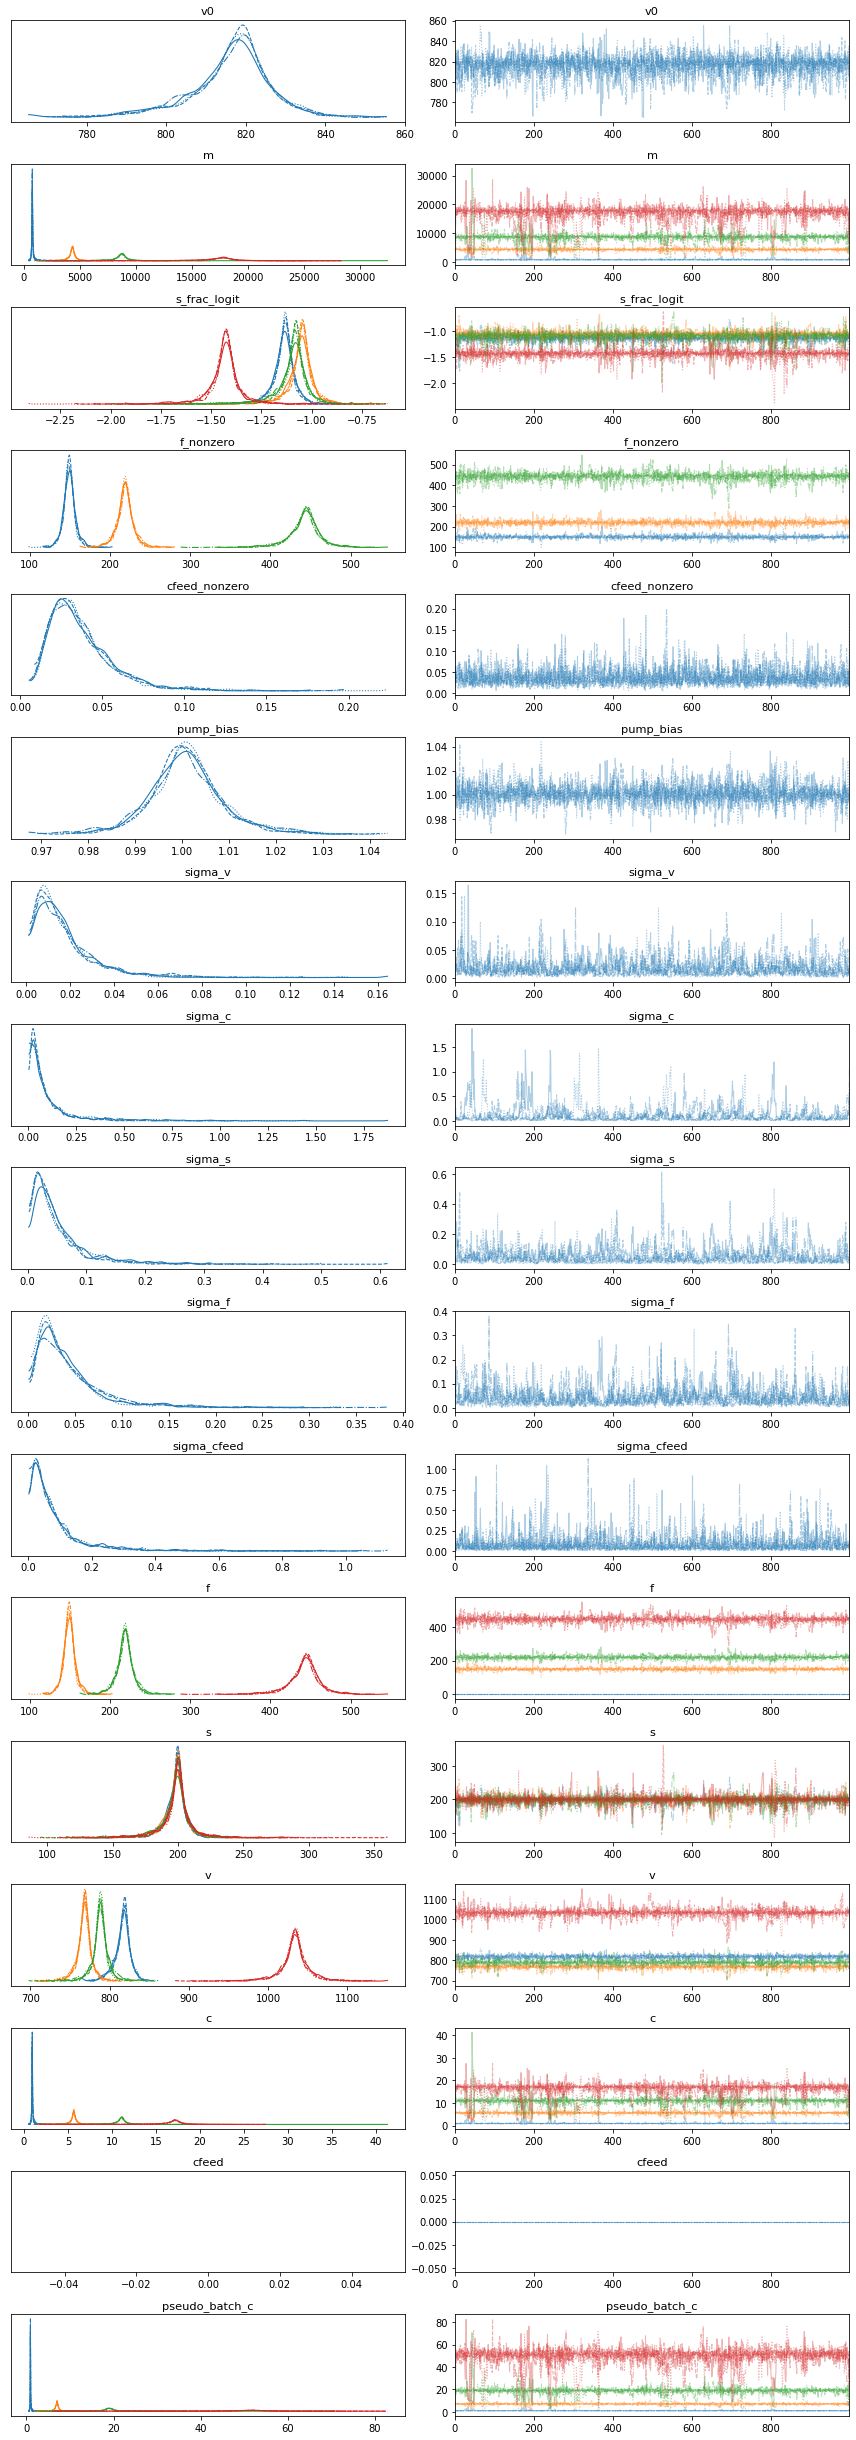

In [6]:
az.plot_trace(infd)
plt.tight_layout()

Plotting just the posterior samples of one parameter

In [7]:
infd.observed_data["v"]

<xarray.DataArray 'v' (time: 4)>
array([ 819.5502288 ,  768.92923864,  788.56755931, 1034.18277398])
Coordinates:
  * time     (time) float64 10.0 30.0 40.0 50.0

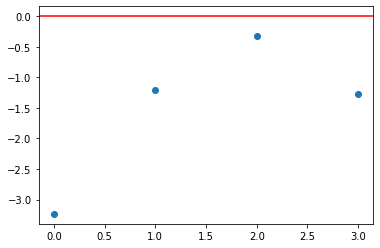

In [8]:
var = "v"

yhat = infd.posterior[var]
y = infd.observed_data[var]

plt.scatter(range(len(y)), yhat.mean(dim=["chain", "draw"]) - y)
plt.axhline(0, color="red")

[]

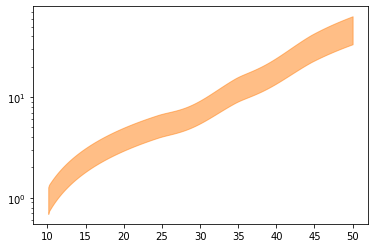

In [9]:
time_data = infd.posterior.time
y_data = infd.posterior.pseudo_batch_c
az.plot_hdi(time_data, y_data)
plt.semilogy()

In [10]:
# make a function which fits a log-linear model through pandas .apply
def fit_log_linear_model(df):
    x = df.time.values
    y = df.pseudo_batch_c.values
    logy = np.log(y)
    slope, intercept = np.polyfit(x, logy, 1)
    return pd.Series([slope, intercept], index=['slope', 'intercept'])

0.025    0.068538
0.500    0.099800
0.975    0.105012
Name: slope, dtype: float64


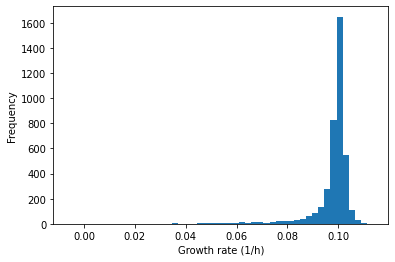

In [11]:
posterior_df = (infd
    .posterior['pseudo_batch_c']
    .to_dataframe()
    .reset_index()
)
fitted_growth_rates = (posterior_df
    .groupby(['chain', 'draw'])
    .apply(fit_log_linear_model) 
)

# plot a histogram of the fitted slopes (growth rates)
fitted_growth_rates.slope.plot.hist(bins=50)
plt.xlabel('Growth rate (1/h)')
plt.ylabel('Frequency')

# the 0.025, 0.5 and 0.975 quantiles of the fitted slopes
print(fitted_growth_rates.slope.quantile([0.025, 0.5, 0.975]))

Text(0.5, 1.0, 'Fitted log-linear model for 50 random samples from the posterior')

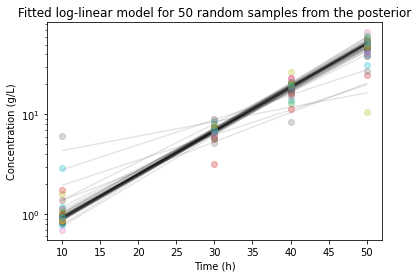

In [12]:
# select 50 random samples from the posterior and plot pseudo_batch_c
# and the fitted log-linear model

sample = fitted_growth_rates.sample(50, random_state=42)

for i, row in sample.iterrows():
    # plot the posterior samples of pseudo_batch_c
    posterior_x = infd.posterior.sel(chain=i[0], draw=i[1])['time'].values
    posterior_y = infd.posterior.sel(chain=i[0], draw=i[1])['pseudo_batch_c'].values
    plt.plot(posterior_x, posterior_y, 'o', alpha=0.3)

    # plot the fitted log-linear model
    slope, intercept = row
    x = np.linspace(posterior_x.min(), posterior_x.max(), 10)
    y = np.exp(intercept + slope * x)
    plt.plot(x, y, 'k', alpha=0.1)


plt.semilogy()
plt.xlabel('Time (h)')
plt.ylabel('Concentration (g/L)')
plt.title('Fitted log-linear model for 50 random samples from the posterior')



In [13]:
infd.posterior

<xarray.Dataset>
Dimensions:          (chain: 4, draw: 1000, time: 4, f_nonzero_dim_0: 3)
Coordinates:
  * chain            (chain) int64 0 1 2 3
  * draw             (draw) int64 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
  * time             (time) float64 10.0 30.0 40.0 50.0
  * f_nonzero_dim_0  (f_nonzero_dim_0) int64 0 1 2
Data variables: (12/17)
    v0               (chain, draw) float64 794.6 794.0 826.8 ... 819.4 817.9
    m                (chain, draw, time) float64 737.1 4.585e+03 ... 6.098e+03
    s_frac_logit     (chain, draw, time) float64 -1.2 -1.106 ... -1.049 -1.424
    f_nonzero        (chain, draw, f_nonzero_dim_0) float64 156.0 ... 455.5
    cfeed_nonzero    (chain, draw) float64 0.01215 0.01401 ... 0.03765 0.05268
    pump_bias        (chain, draw) float64 1.017 1.018 1.008 ... 1.006 1.004
    ...               ...
    f                (chain, draw, time) float64 0.0 156.0 205.1 ... 220.0 455.5
    s                (chain, draw, time) float64 184.0 190.7 ... 204.9 201.8
    v                (chain, draw, time) float64 794.6 766.6 ... 789.6 1.04e+03
    c                (chain, draw, time) float64 0.9277 5.98 ... 9.721 5.862
    cfeed            (chain, draw) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pseudo_batch_c   (chain, draw, time) float64 0.9277 7.508 ... 16.91 18.14
Attributes:
    created_at:                 2023-01-16T17:05:56.024990
    arviz_version:              0.12.1
    inference_library:          cmdstanpy
    inference_library_version:  1.0.7

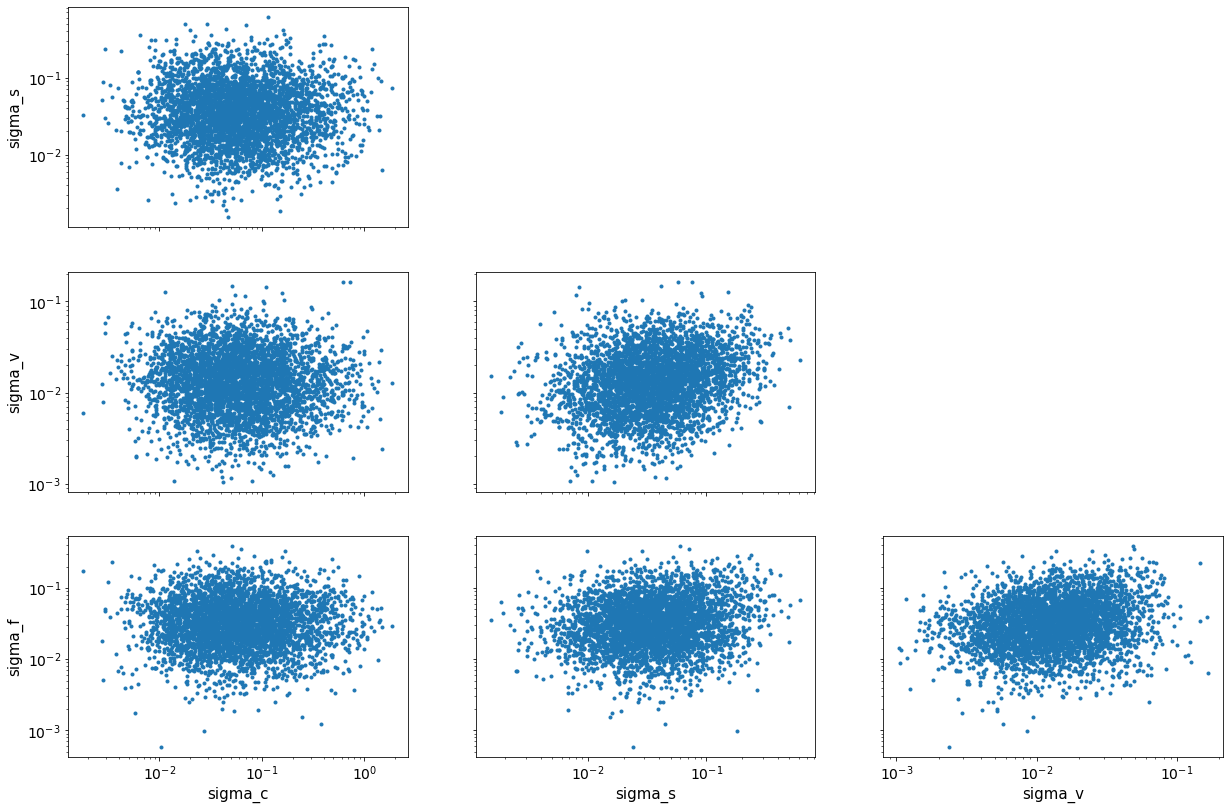

In [14]:
az.plot_pair(infd, var_names=['sigma_c', 'sigma_s', 'sigma_v', 'sigma_f'], divergences=True)
for ax in np.ravel(plt.gcf().axes):
    ax.semilogx()
    ax.semilogy()

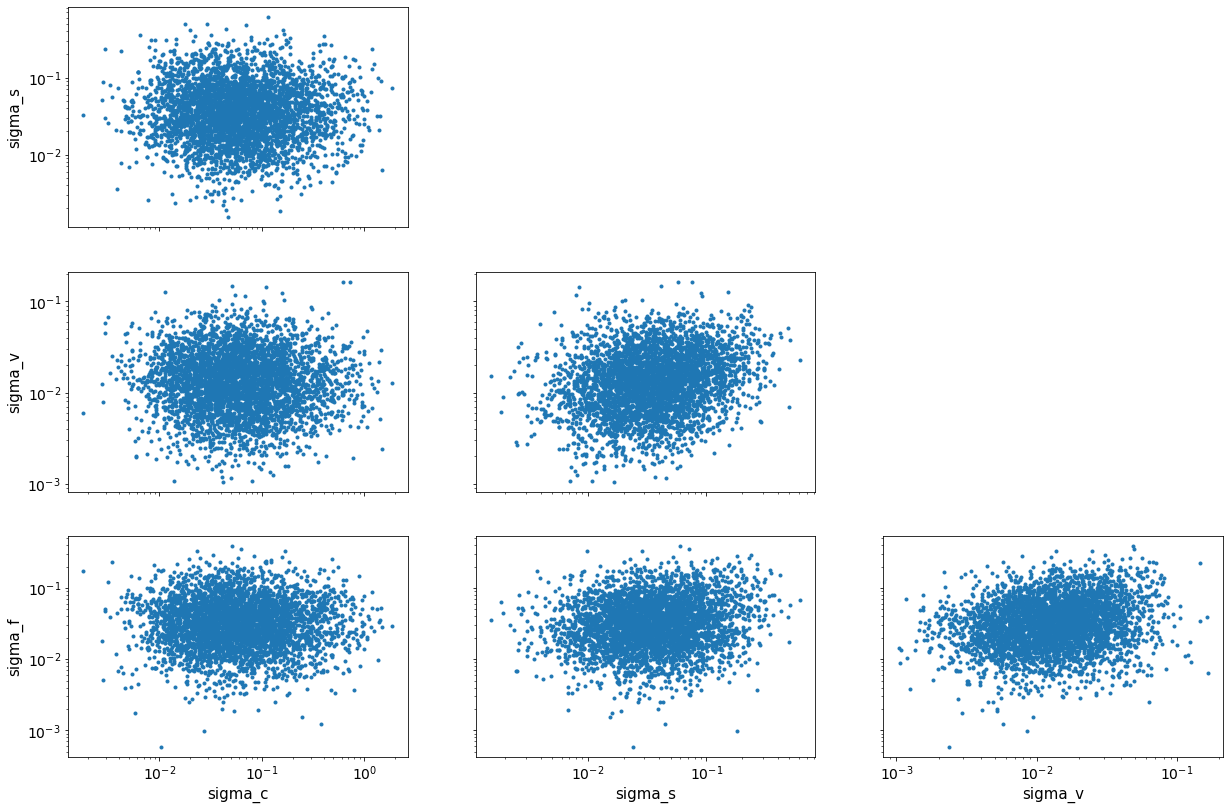

In [15]:
az.plot_pair(infd, var_names=['sigma_c', 'sigma_s', 'sigma_v', 'sigma_f'], divergences=True)
fig = plt.gcf()

# put all axes in fig on log scale
for ax in fig.axes:
    ax.set_xscale('log')
    ax.set_yscale('log')

/var/folders/ql/z_6fb5792v1_8tscf4hg5byc0000gp/T/ipykernel_20796/3358941551.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xscale('log')


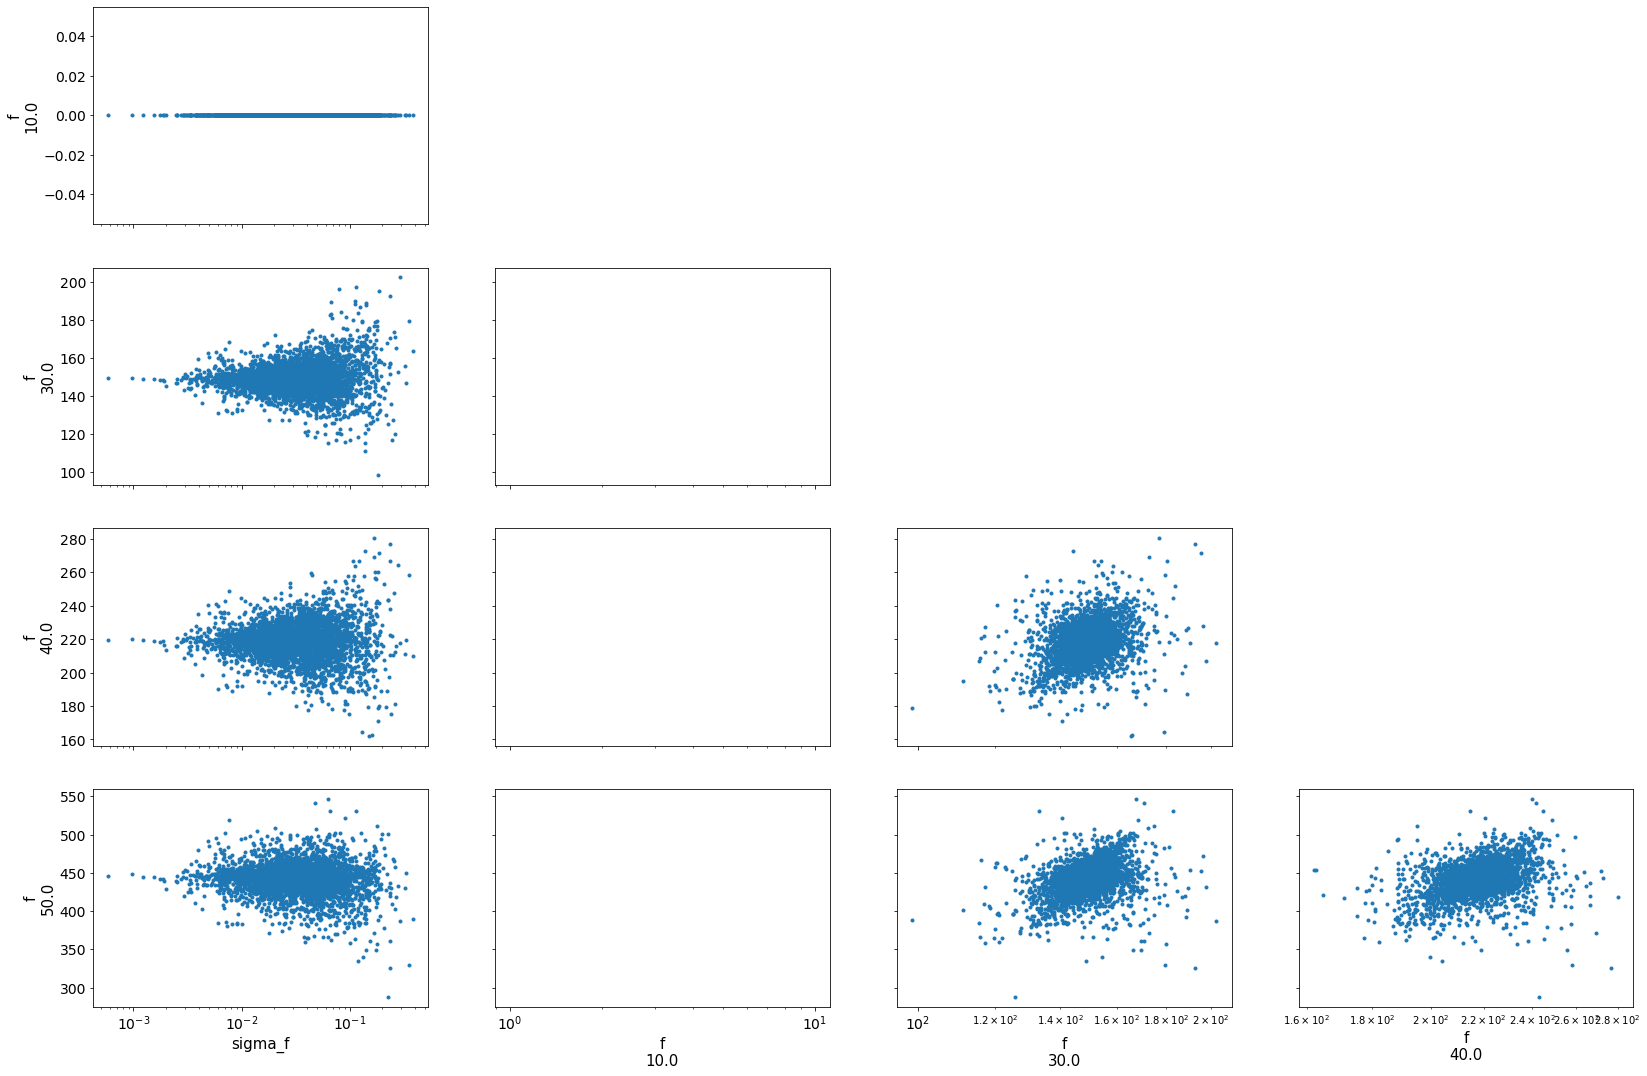

In [16]:
az.plot_pair(infd, var_names=['sigma_f', 'f'], divergences=True)
fig = plt.gcf()
# put all axes in fig on log scale
for ax in fig.axes:
   ax.set_xscale('log')
#   ax.set_yscale('log')

## Visualising correlation between measurement error and growth rate estimation error


<AxesSubplot:title={'center':'sigma_c'}>

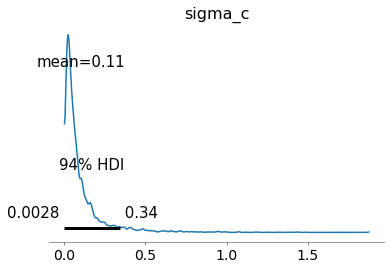

In [17]:
az.plot_posterior(infd, var_names=['sigma_c'])

The posterior samples of the sigma_c is much larger than I expected. I would expect the model to much more accurate about the concentration measurements.